# Part B: Zillow House Price Regression

#### Variable Description:
- Price - price of property (dependent variable)
- Area - size of the property (square feet)
- Bedrooms - number of bedrooms in the property
- Bathrooms - number of bathrooms in the property
- Stories - number of floors in the property
- Mainroad - indicates if the property is located close to a main road
- Guestroom - indicates if the property has a guest room
- Basement - indicates if the property has a basement
- Hot Water Heating - indicates if the property uses gas for hot water heater
- Air Conditioning - indicates if the property has an air conditioning unit
- Parking - number of parking spaces
- Pref Area - indicates if the property is located in a preferred neighbourhood of the city
- Furninghing - indicates if the house is furnished or not

 ### Load and Explore Data Structure

In [11]:
# Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
raw_zillow = pd.read_csv("House_Price.csv")
raw_zillow.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# Rename columns for easier coding
raw_zillow = raw_zillow.rename(columns = {"bathrooms":"bath", "hotwaterheating":"hotwater", "airconditioning": "aircon",
                      "furnishingstatus":"furnishing"})
raw_zillow.columns

Index(['price', 'area', 'bedrooms', 'bath', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwater', 'aircon', 'parking', 'prefarea', 'furnishing'],
      dtype='object')

In [4]:
# View structure of the dataset
raw_zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   price       545 non-null    int64 
 1   area        545 non-null    int64 
 2   bedrooms    545 non-null    int64 
 3   bath        545 non-null    int64 
 4   stories     545 non-null    int64 
 5   mainroad    545 non-null    object
 6   guestroom   545 non-null    object
 7   basement    545 non-null    object
 8   hotwater    545 non-null    object
 9   aircon      545 non-null    object
 10  parking     545 non-null    int64 
 11  prefarea    545 non-null    object
 12  furnishing  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
# View summary statistics
raw_zillow.describe()

,price,area,bedrooms,bath,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
# Check for any null values
raw_zillow.isnull().sum()

price         0
area          0
bedrooms      0
bath          0
stories       0
mainroad      0
guestroom     0
basement      0
hotwater      0
aircon        0
parking       0
prefarea      0
furnishing    0
dtype: int64

### Exploratory Data Analysis

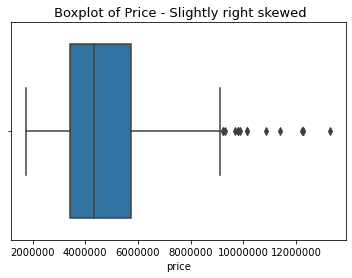

In [12]:
# Distribution of Price (dependent variable)
sns.boxplot(x=raw_zillow.price, data=raw_zillow);
plt.title(" Boxplot of Price - Slightly right skewed", fontsize=13)
plt.ticklabel_format(style='plain', axis='x')

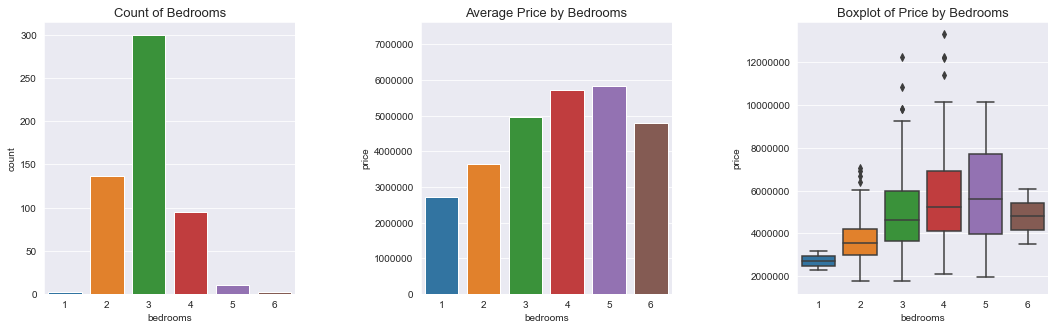

In [13]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,5))
plt.subplots_adjust(wspace = 0.5)


plt.subplot(131)
sns.countplot(x="bedrooms", data=raw_zillow)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Count of Bedrooms", fontsize=13)


plt.subplot(132)
sns.barplot(x="bedrooms", y="price", data=raw_zillow, errwidth=False)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Average Price by Bedrooms", fontsize=13);

plt.subplot(133)
sns.boxplot(x="bedrooms", y="price", data=raw_zillow)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Boxplot of Price by Bedrooms", fontsize=13);


* Observation - there are alot more 3 bedroom properties. Average price of 3, 4, and 5 bedrooms(the other variables are also involved in the price) are much higher than others. Additionally 3, 4, and 5 bedroom properties have a wider range of prices.

* The charts below examine the other categorical variables by show the frequency along with the average price.

In [14]:
# Function to compare frequency and average price of categorical variables
def my_function(df, var1, var2):
    
    sns.set_style("darkgrid")
    plt.figure(figsize=(18,5))
    plt.subplots_adjust(wspace = 0.5)
   
    title = str(var1).title()
    
    plt.subplot(131)
    sns.countplot(x=str(var1), data=df)
    plt.ticklabel_format(style='plain', axis='y')
    plt.title("Count ({})".format(title), fontsize=13)
    
    plt.subplot(132)
    sns.barplot(x=str(var1), y=str(var2), data=df, errwidth=False)
    plt.ticklabel_format(style='plain', axis='y')
    plt.title("Average Price ({})".format(title), fontsize=13)
    
    plt.subplot(133)
    sns.boxplot(x=str(var1), y=str(var2), data=df)
    plt.ticklabel_format(style='plain', axis='y')
    plt.title("Price Distribution ({})".format(title), fontsize=13);

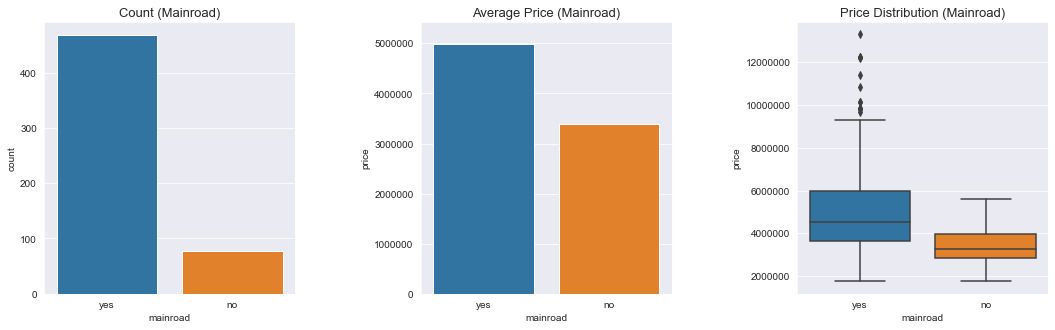

In [15]:
my_function(raw_zillow, "mainroad", "price");

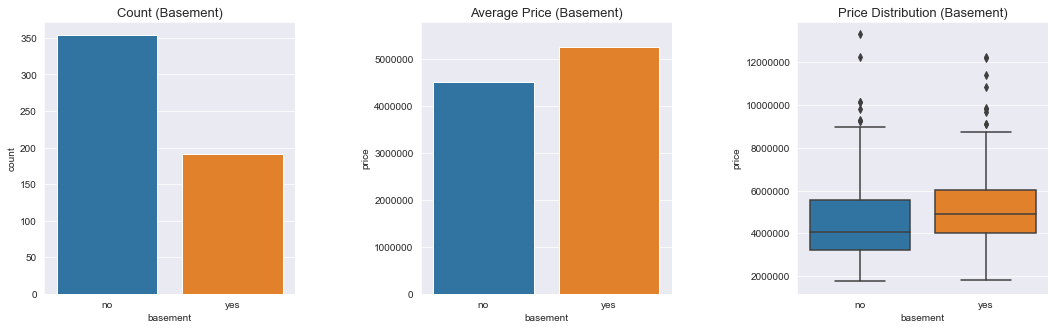

In [16]:
my_function(raw_zillow, "basement", "price");

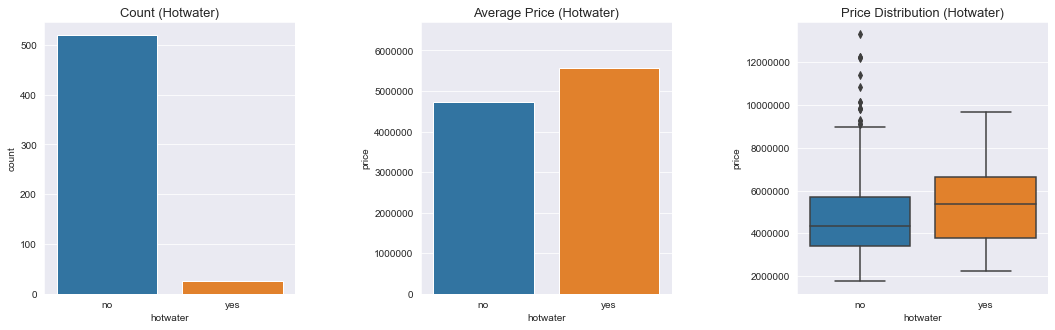

In [17]:
my_function(raw_zillow, "hotwater", "price");

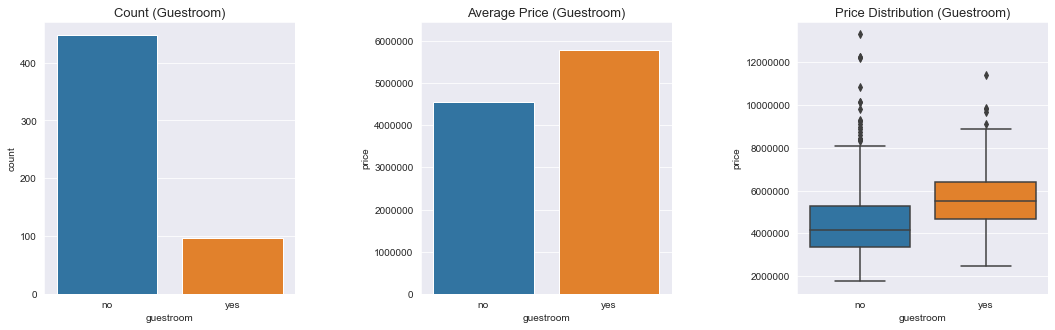

In [18]:
my_function(raw_zillow, "guestroom", "price");

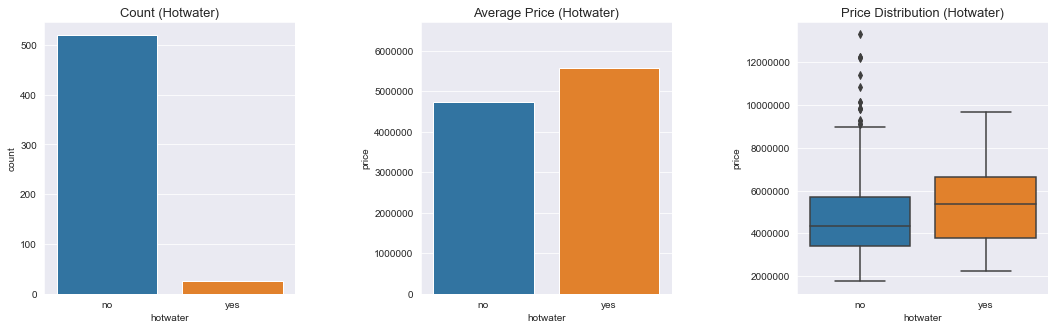

In [19]:
my_function(raw_zillow, "hotwater", "price");

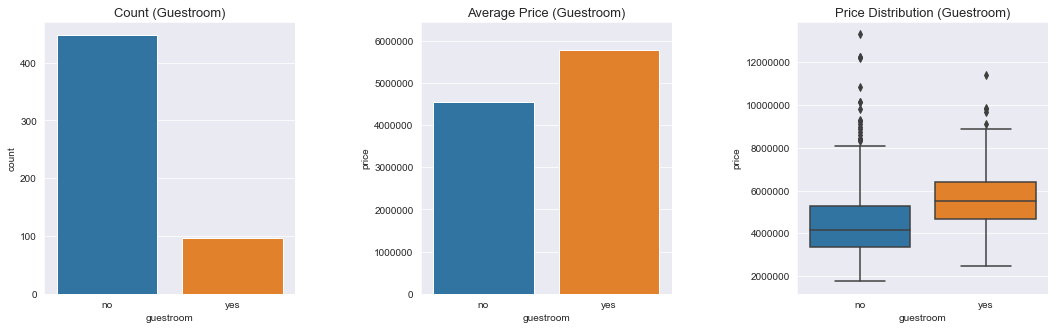

In [20]:
my_function(raw_zillow, "guestroom", "price");

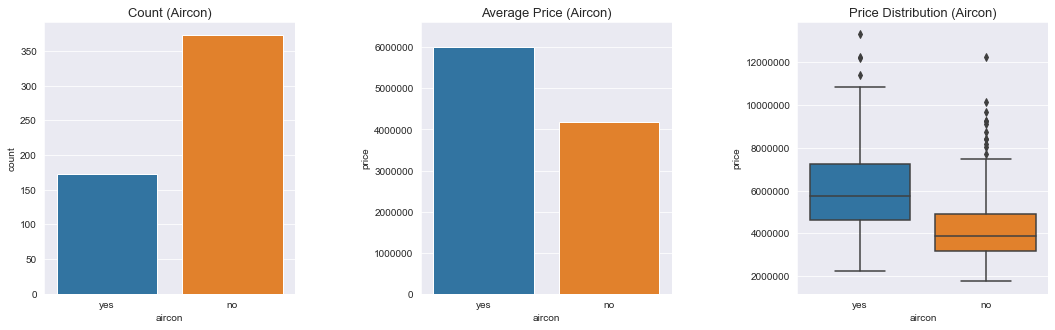

In [21]:
my_function(raw_zillow, "aircon", "price");

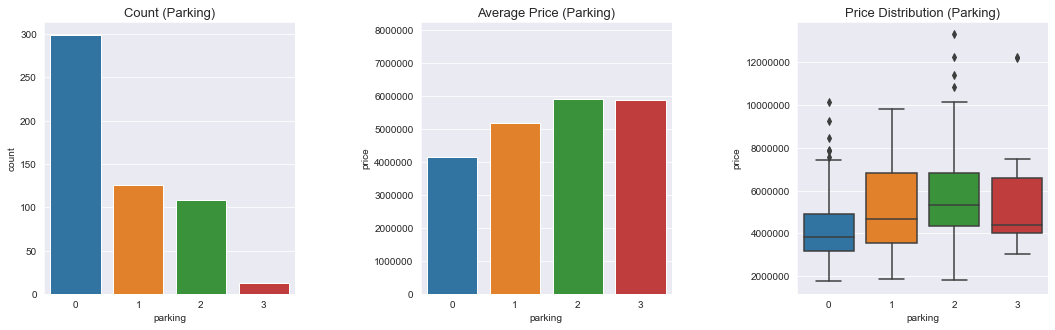

In [22]:
my_function(raw_zillow, "parking", "price");

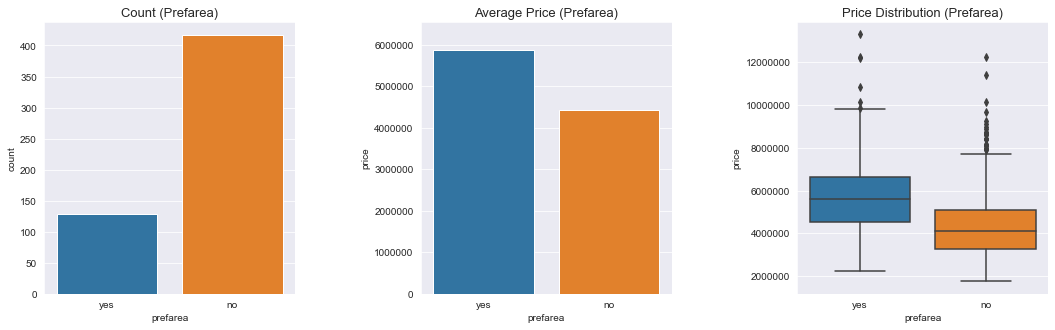

In [23]:
my_function(raw_zillow, "prefarea", "price");

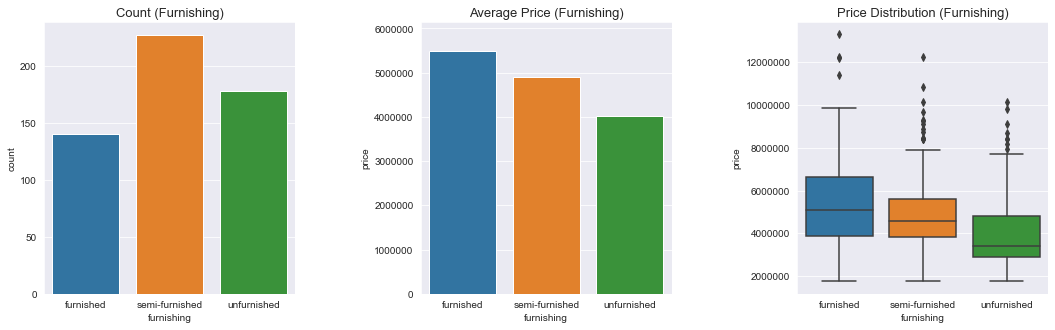

In [24]:
my_function(raw_zillow, "furnishing", "price");

### transform "yes" and "no" values to 1 and 0

In [26]:
# iterate over the columns
for col in raw_zillow.columns:
    if raw_zillow.loc[0, col] in ["yes", "no"]: # if the first row of each column corresponds to yes or no
        raw_zillow[col] = raw_zillow[col].map({"yes":1, "no":0}) # convert them to 1 or 0 

raw_zillow.head(10)

,price,area,bedrooms,bath,stories,mainroad,guestroom,basement,hotwater,aircon,parking,prefarea,furnishing
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished


### convert the categorical variable "furnishingstatus" to a dummy variable

In [29]:
# convert it to a dummy variable and drop the first dummy so  [semi and unfurnished are 0] = "furnished" 
raw_zillow = pd.get_dummies(raw_zillow, columns = ["furnishing"], drop_first = True)
raw_zillow.head(10)

,price,area,bedrooms,bath,stories,mainroad,guestroom,basement,hotwater,aircon,parking,prefarea,furnishing_semi-furnished,furnishing_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1,0
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1,0
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0,1
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,0,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0,1


### Split the dataset into train and test sets

In [30]:
from sklearn.model_selection import train_test_split

y = raw_zillow["price"] # dependent variable = "price"
X = raw_zillow.iloc[:, 1:] # independent variables = the rest of the variables

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 123) # train:test = 8:2

In [31]:
import statsmodels.api as sm

x_train_const = sm.add_constant(x_train) # add a constant column

train_ml_result = sm.OLS(y_train, x_train_const).fit()
train_ml_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     72.17
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           1.70e-98
Time:                        02:24:13   Log-Likelihood:                -6662.8
No. Observations:                 436   AIC:                         1.335e+04
Df Residuals:                     422   BIC:                         1.341e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       1.44e+05   2.91e+05      0.495      0.621   -4.28e+05    7.15e+05
area                        256.7860     27.324      9.398      0.000     203.077     310.495
bedrooms                   8.118e+04   8.01e+04      1.014      0.311   -7.62e+04    2.39e+05
bath                       9.843e+05    1.2e+05      8.207      0.000    7.49e+05    1.22e+06
stories                    4.189e+05   7.14e+04      5.867      0.000    2.79e+05    5.59e+05
mainroad                   3.473e+05    1.6e+05      2.165      0.031     3.2e+04    6.63e+05
guestroom                    3.4e+05   1.49e+05      2.277      0.023    4.65e+04    6.33e+05
basement                   2.893e+05   1.24e+05      2.330      0.020    4.52e+04    5.33e+05
hotwater                   6.453e+05   2.62e+05      2.462      0.014     1.3e+05    1.16e+06
aircon                     9.774e+05   1.21e+05      8.083      0.000     7.4e+05    1.22e+06
parking                    2.623e+05   6.39e+04      4.107      0.000    1.37e+05    3.88e+05
prefarea                   7.937e+05    1.3e+05      6.120      0.000    5.39e+05    1.05e+06
furnishing_semi-furnished -3.743e+04   1.31e+05     -0.285      0.775   -2.95e+05     2.2e+05
furnishing_unfurnished    -4.017e+05   1.41e+05     -2.850      0.005   -6.79e+05   -1.25e+05
==============================================================================
Omnibus:                       90.589   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.842
Skew:                           0.988   Prob(JB):                     2.06e-55
Kurtosis:                       6.156   Cond. No.                     3.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### * F-test p-value of the multivariate regression model presents the statistical significance of the overall model and an approximate 68% of the variation in "Yearly-Amount Spent" in population is explained by the predictors based on the adjusted R-squred.
###  * Each of the independent variables excepting "bedrooms" & "semi-furnished" seems to have their unique ability to predict the "housing price" based on their t-test p-value smaller than 0.05. 
### * Create a annotated heatmap to check correlations among variables

In [32]:
# concatenate x_train and y_train to make a single dataframe

train_df = pd.concat([y_train, x_train], axis = 1)
train_df.head()

,price,area,bedrooms,bath,stories,mainroad,guestroom,basement,hotwater,aircon,parking,prefarea,furnishing_semi-furnished,furnishing_unfurnished
435,3290000,4040,2,1,1,1,0,0,0,0,0,0,0,1
509,2590000,3600,2,2,2,1,0,1,0,0,1,0,0,0
55,7350000,6000,3,1,2,1,0,0,0,1,1,0,0,1
196,4970000,7686,3,1,1,1,1,1,1,0,0,0,1,0
288,4200000,5040,3,1,2,1,0,1,0,1,0,0,0,1


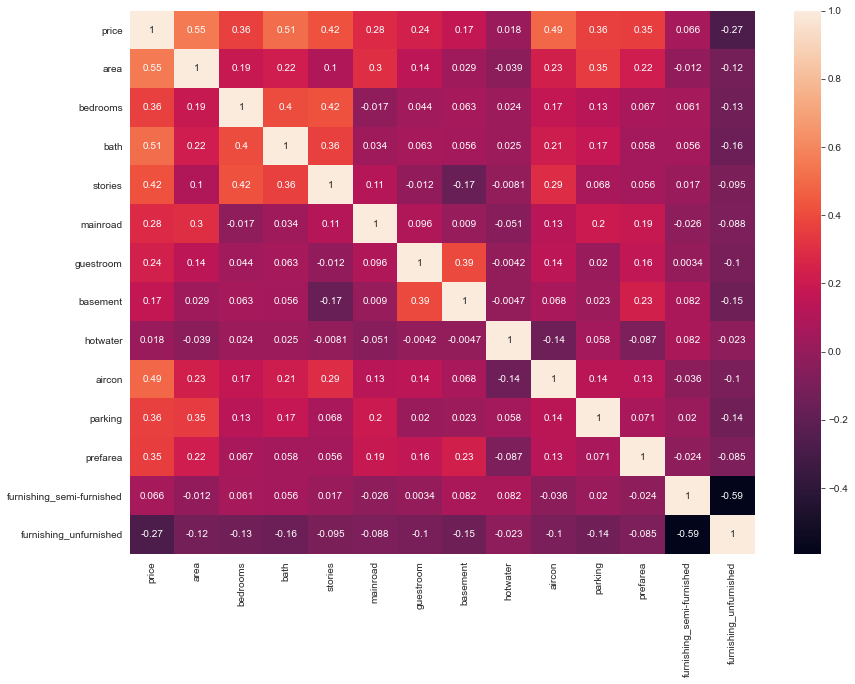

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (14, 10))
sns.heatmap(train_df.corr(), annot = True)

### * no multicollinearity issue and no variables significantly correlated with "bedrooms" or "semi-furnished" are observed. That is, droppingn both or either the variables will unlikely affect other variables
### * Determine whether to drop the "bedrooms" & "semi-furnished" variables 

In [34]:
# First, explore the "bedrooms" variable

x_train["bedrooms"].describe()

count    436.000000
mean       2.967890
std        0.754375
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        6.000000
Name: bedrooms, dtype: float64

(array([  1.,   0., 114.,   0., 231.,   0.,  80.,   0.,   8.,   2.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

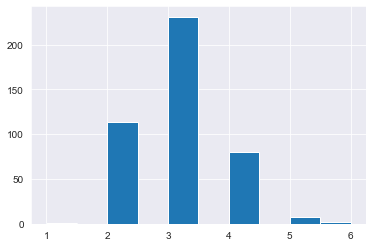

In [35]:
# histogram for "bedrooms"
plt.hist(x_train["bedrooms"])

### * mean and median is highly close and the histogram also shows the "bedrooms" is not skewed
### * compare the adj r-squared before and after the variable is dropped from the dataset

In [36]:
# remove the "bedrooms" variable from x_train 
x_train2 = x_train.drop(["bedrooms"], axis = 1)
x_train2.head()

,area,bath,stories,mainroad,guestroom,basement,hotwater,aircon,parking,prefarea,furnishing_semi-furnished,furnishing_unfurnished
435,4040,1,1,1,0,0,0,0,0,0,0,1
509,3600,2,2,1,0,1,0,0,1,0,0,0
55,6000,1,2,1,0,0,0,1,1,0,0,1
196,7686,1,1,1,1,1,1,0,0,0,1,0
288,5040,1,2,1,0,1,0,1,0,0,0,1


In [37]:
# fit the mlr model again with the free-bedrooms train dataset

train_ml_result2 = sm.OLS(y_train, sm.add_constant(x_train2)).fit()
train_ml_result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     78.09
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           3.12e-99
Time:                        02:25:02   Log-Likelihood:                -6663.3
No. Observations:                 436   AIC:                         1.335e+04
Df Residuals:                     423   BIC:                         1.341e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2.963e+05   2.49e+05      1.190      0.235   -1.93e+05    7.86e+05
area                        260.1521     27.123      9.592      0.000     206.840     313.464
bath                       1.014e+06   1.16e+05      8.712      0.000    7.85e+05    1.24e+06
stories                    4.438e+05   6.71e+04      6.620      0.000    3.12e+05    5.76e+05
mainroad                   3.281e+05   1.59e+05      2.060      0.040     1.5e+04    6.41e+05
guestroom                  3.369e+05   1.49e+05      2.257      0.025    4.35e+04     6.3e+05
basement                   3.033e+05   1.23e+05      2.458      0.014    6.07e+04    5.46e+05
hotwater                   6.501e+05   2.62e+05      2.481      0.013    1.35e+05    1.17e+06
aircon                     9.758e+05   1.21e+05      8.070      0.000    7.38e+05    1.21e+06
parking                    2.649e+05   6.38e+04      4.152      0.000     1.4e+05     3.9e+05
prefarea                   7.942e+05    1.3e+05      6.123      0.000    5.39e+05    1.05e+06
furnishing_semi-furnished -3.624e+04   1.31e+05     -0.276      0.782   -2.94e+05    2.21e+05
furnishing_unfurnished    -4.059e+05   1.41e+05     -2.881      0.004   -6.83e+05   -1.29e+05
==============================================================================
Omnibus:                       92.940   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.055
Skew:                           1.008   Prob(JB):                     1.25e-57
Kurtosis:                       6.219   Cond. No.                     3.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### * As expected, there's no change in adjusted r-squared
### * Drop the semi-furnished 

In [39]:
x_train2 = x_train2.drop(["furnishing_semi-furnished"], axis = 1)
x_train2.head()

,area,bath,stories,mainroad,guestroom,basement,hotwater,aircon,parking,prefarea,furnishing_unfurnished
435,4040,1,1,1,0,0,0,0,0,0,1
509,3600,2,2,1,0,1,0,0,1,0,0
55,6000,1,2,1,0,0,0,1,1,0,1
196,7686,1,1,1,1,1,1,0,0,0,0
288,5040,1,2,1,0,1,0,1,0,0,1


In [40]:
# fit the mlr model again with the new train dataset

train_ml_result3 = sm.OLS(y_train, sm.add_constant(x_train2)).fit()
train_ml_result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     85.37
Date:                Wed, 25 Nov 2020   Prob (F-statistic):          3.42e-100
Time:                        02:25:41   Log-Likelihood:                -6663.4
No. Observations:                 436   AIC:                         1.335e+04
Df Residuals:                     424   BIC:                         1.340e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2.683e+05   2.27e+05      1.181      0.238   -1.78e+05    7.15e+05
area                     260.3665     27.082      9.614      0.000     207.134     313.598
bath                    1.014e+06   1.16e+05      8.725      0.000    7.86e+05    1.24e+06
stories                 4.439e+05    6.7e+04      6.628      0.000    3.12e+05    5.76e+05
mainroad                3.302e+05   1.59e+05      2.078      0.038    1.78e+04    6.43e+05
guestroom               3.391e+05   1.49e+05      2.277      0.023    4.63e+04    6.32e+05
basement                3.024e+05   1.23e+05      2.454      0.015    6.02e+04    5.45e+05
hotwater                6.453e+05   2.61e+05      2.470      0.014    1.32e+05    1.16e+06
aircon                  9.781e+05   1.21e+05      8.117      0.000    7.41e+05    1.21e+06
parking                 2.657e+05   6.37e+04      4.173      0.000    1.41e+05    3.91e+05
prefarea                7.961e+05   1.29e+05      6.154      0.000    5.42e+05    1.05e+06
furnishing_unfurnished -3.824e+05   1.12e+05     -3.406      0.001   -6.03e+05   -1.62e+05
==============================================================================
Omnibus:                       93.439   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              264.533
Skew:                           1.012   Prob(JB):                     3.61e-58
Kurtosis:                       6.235   Cond. No.                     2.92e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### * after dropping the "semi-furnished" variable, the adj r-squared has increased by 0.001 and all t-test p-values and F-test p-value are smaller than 0.05, which indicate that we can reasonbly be sure that the slope of each predictor is not 0 in population holding the other predictors constant and the overall model is also statistically significant

## Diagnose the model 

Text(0.5, 0, 'Residual')

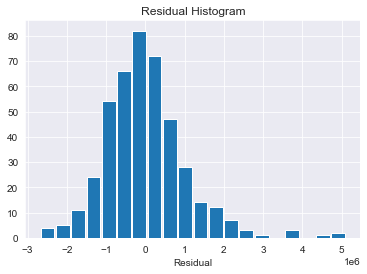

In [41]:
# Residual histogram
train_resid = train_ml_result3.resid # get the residuals of the MLR model
plt.hist(train_resid, bins=20, rwidth=0.9)
plt.title("Residual Histogram")
plt.xlabel("Residual")

### * the residual histogram seems to have ourliers 
### * detect and remove outliers

### 1) conduct a normalized residual test to detect outliers

Text(0.5, 0, 'Normalized Residuals')

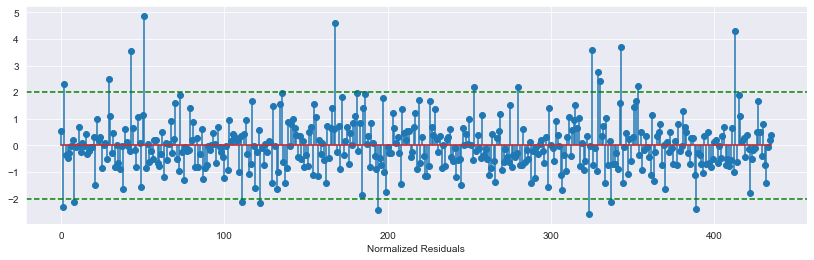

In [42]:
# whether the normalized residuals are lying within a rule-of-thumb threshold 
norm_resid = train_ml_result3.get_influence().resid_studentized_internal

plt.figure(figsize = (14, 4))
plt.stem(norm_resid)
plt.axhline(2, c="g", ls="--") # outliers if the normalized residuals are bigger than |2| ~ |4|
plt.axhline(-2, c="g", ls="--") # set the threshold as |2|
plt.xlabel("Normalized Residuals")

In [43]:
# Detect the indices of norm_resid values outbound the range (|3|)
import numpy as np

norm_resid_df = pd.DataFrame(norm_resid, columns = ["norm_resid"])

resid_outlier = norm_resid_df[np.abs(norm_resid_df["norm_resid"]) > 2].index # get the indices of the observations lying outside the range

In [44]:
# create a data frame with x_train & y_train and reset the index to match the detected outlier indices 

train_df2 = pd.concat([y_train, x_train2], axis = 1)
train_df2 = train_df2.reset_index(drop=True)
train_df2.head()

,price,area,bath,stories,mainroad,guestroom,basement,hotwater,aircon,parking,prefarea,furnishing_unfurnished
0,3290000,4040,1,1,1,0,0,0,0,0,0,1
1,2590000,3600,2,2,1,0,1,0,0,1,0,0
2,7350000,6000,1,2,1,0,0,0,1,1,0,1
3,4970000,7686,1,1,1,1,1,1,0,0,0,0
4,4200000,5040,1,2,1,0,1,0,1,0,0,1


In [45]:
# drop the detected indexes
train_df3 = train_df2.drop(resid_outlier)
train_df3.head()

,price,area,bath,stories,mainroad,guestroom,basement,hotwater,aircon,parking,prefarea,furnishing_unfurnished
0,3290000,4040,1,1,1,0,0,0,0,0,0,1
3,4970000,7686,1,1,1,1,1,1,0,0,0,0
4,4200000,5040,1,2,1,0,1,0,1,0,0,1
5,2800000,3960,1,1,1,0,0,0,0,0,0,0
6,3220000,4370,1,2,1,0,0,0,0,0,0,1


### * Conduct a z-score test too with the new data frame created right above

In [46]:
from scipy import stats

# remove values whose z-score > |3| across all the columns 
train_df4 = train_df3[(np.abs(stats.zscore(train_df3)) < 3).all(axis=1)] # extract the only rows whose absolute z-scores are smaller than 3
train_df4 = train_df4.reset_index(drop = True)
train_df4.head()

,price,area,bath,stories,mainroad,guestroom,basement,hotwater,aircon,parking,prefarea,furnishing_unfurnished
0,3290000,4040,1,1,1,0,0,0,0,0,0,1
1,4200000,5040,1,2,1,0,1,0,1,0,0,1
2,2800000,3960,1,1,1,0,0,0,0,0,0,0
3,3220000,4370,1,2,1,0,0,0,0,0,0,1
4,3150000,3450,1,1,1,0,0,0,0,0,0,0


In [47]:
# extract the y and x variables from the train_df4 
# and then fit a mlr model again with the new datasets
y_train = train_df4["price"]
x_train = train_df4.iloc[:, 1:]
train_ml_result4 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

### * Check the Cook's distance

Text(0, 0.5, 'Cooks Distance')

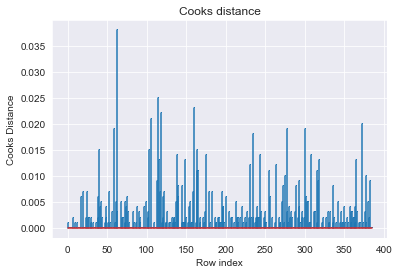

In [48]:
# create a graph for cook's distance
train_influence = train_ml_result4.get_influence()
(c, p) = train_influence.cooks_distance
plt.stem(np.arange(len(x_train)),
np.round(c, 3),
markerfmt=",")
plt.title("Cooks distance")
plt.xlabel("Row index")
plt.ylabel("Cooks Distance")

In [49]:
train_cooks = train_influence.cooks_distance[0] # get cook's distance
outlier_list = [] 
for i in range(len(train_cooks)):
    if train_cooks[i] > 4/(len(train_cooks)-len(train_ml_result4.params)-1): # use the rule of thumb suggested by Fox to find large D
        outlier_list.append(i)  # put the filtered indices into the empty list
print(outlier_list) 

[40, 59, 62, 103, 105, 114, 116, 118, 138, 149, 160, 163, 164, 165, 175, 231, 235, 243, 264, 278, 300, 308, 318, 365, 372]


In [50]:
train_df5 = train_df4.drop(outlier_list) # remove the rows matched to the indices in the list
train_df5 = train_df5.reset_index(drop=True) # reset the index
y_train = train_df5["price"] # extract the dependent variable from the data frame
x_train = train_df5.iloc[:, 1:] # independent variables 
train_ml_result4 = sm.OLS(y_train, sm.add_constant(x_train)).fit() # re-fit 

### * Create a scatter plot with the predicted y values and studentized residuals 

Text(0, 0.5, 'Studentized Residual')

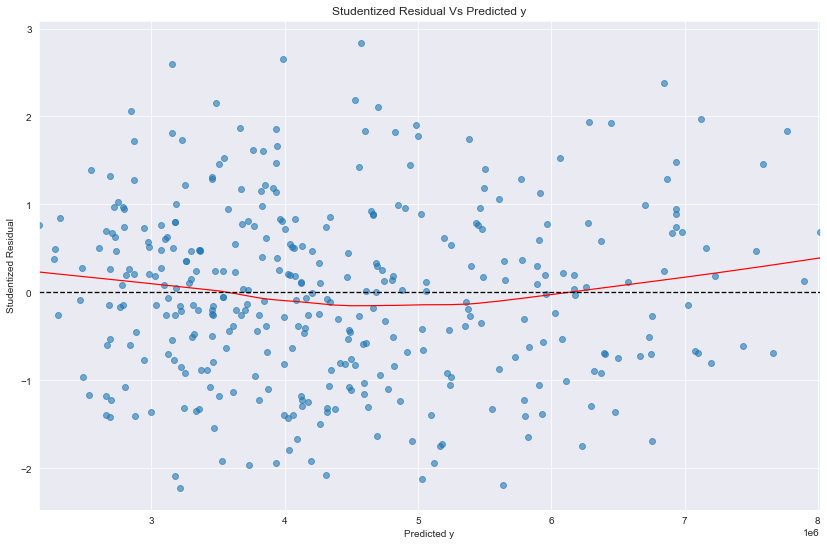

In [51]:
# Scatter plot with studentized residuals and predicted y values
norm_resid2 = train_ml_result4.get_influence().resid_studentized_internal # normalized the residuals
y_predict = train_ml_result4.fittedvalues # get predicted y values

fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot()
ax.scatter(y_predict, norm_resid2, alpha = 0.6)
sns.regplot(y_predict, norm_resid2, scatter = False, ci = False, lowess = True,  # add a line showing the shape of the scatter plot
          line_kws={"color":"red", "lw":1.2})
ax.axhline(y=0, c="black", lw=1.3, ls = "--")
ax.set_title("Studentized Residual Vs Predicted y")
ax.set_xlabel("Predicted y")
ax.set_ylabel("Studentized Residual")

### * neither serious heteroscedasticity nor non-normality features are observed.


### * create a Q-Q plot to make sure the model's normality 

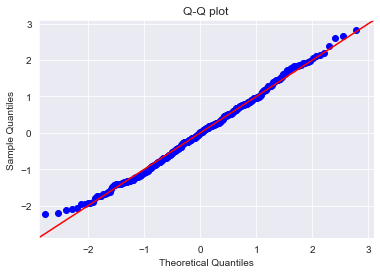

In [52]:
sm.qqplot(norm_resid2, line = "45") 
plt.title("Q-Q plot")
plt.show()

### * the data is well matched to the normal distribution values of the corresponding quantiles 
### * then, standardize the non-categorical independent variables to compare their impacts on the Housing Price

In [53]:
from sklearn.preprocessing import StandardScaler  # load it to standardize independent variables 
scaler = StandardScaler()

part1 = x_train.iloc[:, [0, 1, 2, 8]] # extract only non-categorical columns
part2 = x_train.iloc[:, [3, 4, 5, 6, 7, 9, 10]] # part2 will be concatenated with part1 after scaling

part1_df = pd.DataFrame(scaler.fit_transform(part1), columns = part1.columns) # scaling part1

scaled_x_train = pd.concat([part1_df, part2], axis = 1) # combine the standardaized columns and part2 into a single data frame
scaled_x_train.head()

,area,bath,stories,parking,mainroad,guestroom,basement,hotwater,aircon,prefarea,furnishing_unfurnished
0,-0.448005,-0.516398,-0.897116,-0.710726,1,0,0,0,0,0,1
1,0.110784,-0.516398,0.251320,-0.710726,1,0,1,0,1,0,1
2,-0.492708,-0.516398,-0.897116,-0.710726,1,0,0,0,0,0,0
3,-0.263604,-0.516398,0.251320,-0.710726,1,0,0,0,0,0,1
4,-0.777690,-0.516398,-0.897116,-0.710726,1,0,0,0,0,0,0


In [54]:
scaled_result = sm.OLS(y_train, sm.add_constant(scaled_x_train)).fit()
scaled_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     139.0
Date:                Wed, 25 Nov 2020   Prob (F-statistic):          2.24e-115
Time:                        02:26:36   Log-Likelihood:                -5346.8
No. Observations:                 361   AIC:                         1.072e+04
Df Residuals:                     350   BIC:                         1.076e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3.839e+06   1.07e+05     35.949      0.000    3.63e+06    4.05e+06
area                    4.595e+05   3.99e+04     11.512      0.000    3.81e+05    5.38e+05
bath                    4.028e+05   4.04e+04      9.965      0.000    3.23e+05    4.82e+05
stories                 4.083e+05   4.11e+04      9.940      0.000    3.27e+05    4.89e+05
parking                 1.514e+05   3.68e+04      4.114      0.000     7.9e+04    2.24e+05
mainroad                2.268e+05   1.08e+05      2.103      0.036    1.47e+04    4.39e+05
guestroom               2.898e+05   1.08e+05      2.685      0.008    7.76e+04    5.02e+05
basement                2.822e+05    8.6e+04      3.282      0.001    1.13e+05    4.51e+05
hotwater               -4.695e-10   6.27e-10     -0.749      0.455    -1.7e-09    7.64e-10
aircon                  6.774e+05   8.43e+04      8.035      0.000    5.12e+05    8.43e+05
prefarea                6.891e+05    9.1e+04      7.576      0.000     5.1e+05    8.68e+05
furnishing_unfurnished -3.822e+05   7.68e+04     -4.979      0.000   -5.33e+05   -2.31e+05
==============================================================================
Omnibus:                        3.691   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                3.278
Skew:                           0.156   Prob(JB):                        0.194
Kurtosis:                       2.652   Cond. No.                     8.74e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.07e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [55]:
# resulting coefficients of unscaled predictors
from sklearn.linear_model import LinearRegression 
train_result_sk = LinearRegression().fit(x_train, y_train)
train_result_sk.coef_

array([ 2.56748052e+02,  9.87964673e+05,  4.68857413e+05,  2.26801265e+05,
        2.89828394e+05,  2.82198537e+05, -5.82076609e-11,  6.77445942e+05,
        1.84969049e+05,  6.89135190e+05, -3.82155892e+05])

### * after removing outliers, the model has been improved :
#### 1) Based on the adjusted r-squared, the strength of the overall relationship with dependent variable has increased from 0.681 to      0.75. Now, approximately 79.3% of the variations in "Price" is predictable by the collective independent variables in population. 
#### 2)  the p-value of the intercept has decreased below 0.05
#### 3) F-test P-value has also decreased a huge amount

### -> on the basis of the coefficients of each predictor, "prefarea" shows the stongest positive impacts on the housing price with the interpretation as the house at a prefering area increasing the price by about 689,135 dollars
### -> the top 5 indipendent variables can be listed up by their affects on the dependent variable (price):
#### (1) prefarea
#### (2) aircon
#### (3) area
#### (4) stories
#### (5) furnishing status - furnished
### * in the outlier-free model, "hotwaterheating" has become statistically insignificant individually. 
### * drop the variable from the model and yield the finall results

In [57]:
x_train = x_train.drop(["hotwater"], axis = 1)
final_result_sk = LinearRegression().fit(x_train, y_train)
final_result = sm.OLS(y_train, sm.add_constant(x_train)).fit()
final_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     139.0
Date:                Wed, 25 Nov 2020   Prob (F-statistic):          2.24e-115
Time:                        02:27:29   Log-Likelihood:                -5346.8
No. Observations:                 361   AIC:                         1.072e+04
Df Residuals:                     350   BIC:                         1.076e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   4.575e+05   1.67e+05      2.748      0.006     1.3e+05    7.85e+05
area                     256.7481     22.302     11.512      0.000     212.886     300.611
bath                     9.88e+05   9.91e+04      9.965      0.000    7.93e+05    1.18e+06
stories                 4.689e+05   4.72e+04      9.940      0.000    3.76e+05    5.62e+05
mainroad                2.268e+05   1.08e+05      2.103      0.036    1.47e+04    4.39e+05
guestroom               2.898e+05   1.08e+05      2.685      0.008    7.76e+04    5.02e+05
basement                2.822e+05    8.6e+04      3.282      0.001    1.13e+05    4.51e+05
aircon                  6.774e+05   8.43e+04      8.035      0.000    5.12e+05    8.43e+05
parking                  1.85e+05    4.5e+04      4.114      0.000    9.65e+04    2.73e+05
prefarea                6.891e+05    9.1e+04      7.576      0.000     5.1e+05    8.68e+05
furnishing_unfurnished -3.822e+05   7.68e+04     -4.979      0.000   -5.33e+05   -2.31e+05
==============================================================================
Omnibus:                        3.691   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                3.278
Skew:                           0.156   Prob(JB):                        0.194
Kurtosis:                       2.652   Cond. No.                     2.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Test the trained model with the test data

In [58]:
x_test = x_test.drop(["bedrooms", "hotwater", "furnishing_semi-furnished"], axis = 1) # drop the three columns from x_test

In [59]:
from sklearn.metrics import r2_score, mean_squared_error
pred_y_test = final_result_sk.predict(x_test) # get the predicted y values by plugging x_test values 
np.abs(r2_score(y_test, pred_y_test)) # get the r_squred score

0.5995223217926646

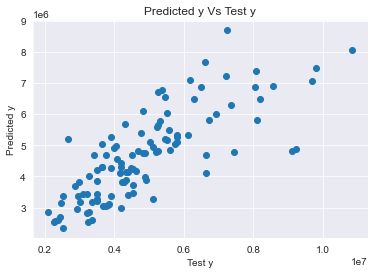

In [60]:
# scatter plot with the predicted y and the test y 
plt.scatter(y_test, pred_y_test)
plt.title("Predicted y Vs Test y")
plt.xlabel("Test y")
plt.ylabel("Predicted y")
plt.show()

### -> the r-squared score (absolute r-sq between the predicted y and test y values) is a 60% approximately